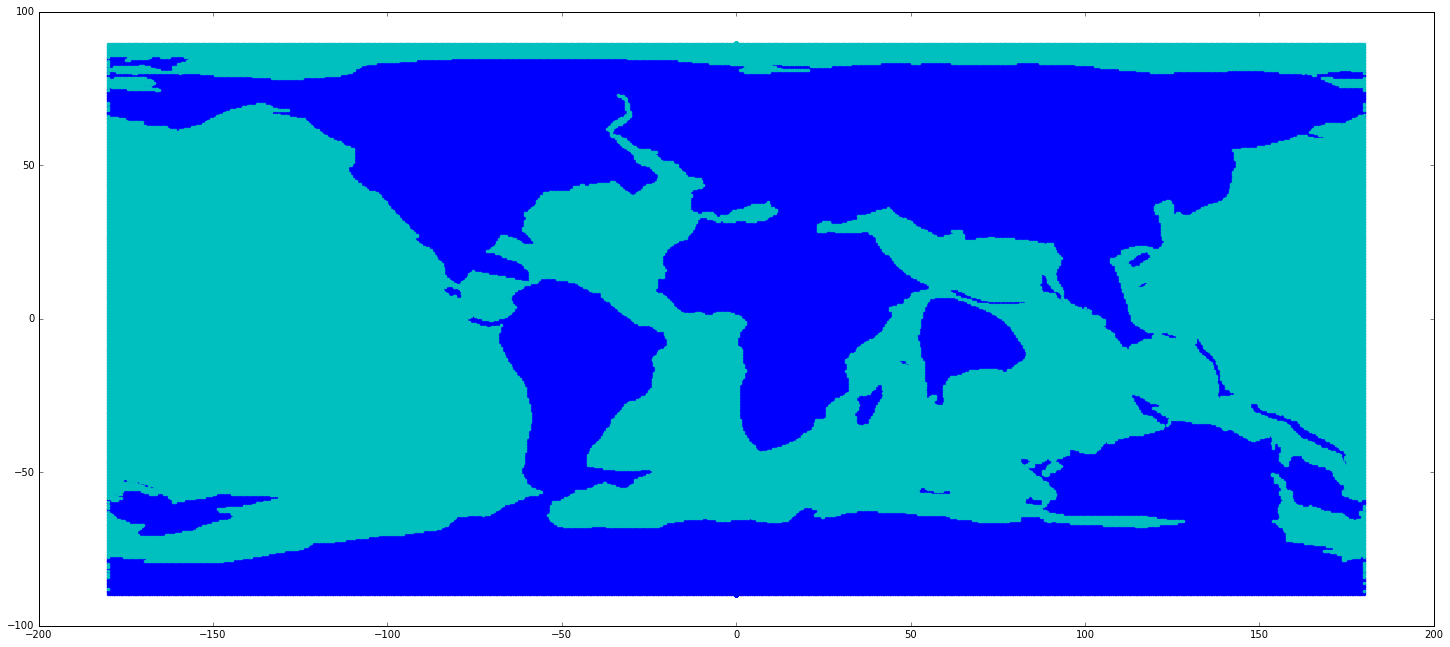

In [1]:
import pygplates
import numpy as np
import points_in_polygons

import matplotlib.pyplot as plt

%matplotlib inline


sampling = 0.5


longitude_array,latitude_array = np.meshgrid(np.arange(-180.,180.001,sampling),np.arange(-90.,90.001,sampling))
longitude_array = longitude_array.flatten()
latitude_array = latitude_array.flatten()

multi_point = pygplates.MultiPointOnSphere(zip(latitude_array,longitude_array))

meshnode_feature = pygplates.Feature()
meshnode_feature.set_name('Multipoint Feature')   
meshnode_feature.set_geometry(multi_point)
    
multipoints = pygplates.FeatureCollection(meshnode_feature)


grid_dims = (int(180/sampling)+1,int(360/sampling)+1)

for multipoint in multipoints:
    for mp in multipoint.get_all_geometries():
        points = mp.to_lat_lon_point_list()

        
sieve_polygons = pygplates.FeatureCollection('polygons_for_quadtree_test.gpmlz')
        
        
rpolygons = []
for polygon in sieve_polygons:
    if polygon.get_geometry():
        rpolygons.append(polygon.get_geometry())

polygons_containing_points = points_in_polygons.find_polygons(points, rpolygons)



lat = []
lon = []

lat_deep = []
lon_deep = []

for pcp,point in zip(polygons_containing_points,points):
    if pcp is not None:
        lat.append(point.get_latitude())
        lon.append(point.get_longitude())
    else:
        lat_deep.append(point.get_latitude())
        lon_deep.append(point.get_longitude())


plt.figure(figsize=(25,11))
plt.plot(lon,lat,'b.')
plt.plot(lon_deep,lat_deep,'c.')

